In [18]:
import numpy as np
from scipy.linalg import eigh_tridiagonal
from numpy.random import randint, rand
from matplotlib import pyplot as plt
import time

from lanczos_dense import lanczos_eig

In [19]:
def rand_herm(size,sparsity):
    mat = np.zeros(size*size)
    nonzero_num = int(size*size*sparsity/2)
    nonzero_idx = randint(0, size**2, size=nonzero_num)
    mat[nonzero_idx] = rand(nonzero_num)
    mat = mat.reshape(size, size)
    mat = mat + mat.T
    return mat

In [20]:
def timeon(size, sparsity, k):
    mat = rand_herm(size, sparsity)
    
    t0 = time.time()
    
    x = rand(size)
    _, W1 = lanczos_eig(mat,x,k)
    eiglanc = W1[:,0]
    
    t1 = time.time()
    
    _, W2 = np.linalg.eigh(mat)
    eigres = W2[:,0]

    t2 = time.time()
    
    fidelity = np.abs(eigres @ eiglanc)
    
    tlanc = t1 - t0
    teigh = t2 - t1
    
    return tlanc, teigh, (teigh - tlanc) > 0, fidelity
    

In [21]:
def avg_run(repeats, size, sparsity, k):
    tlanc_list = []
    teigh_list = []
    fidelity_list = []
    for idx in range(repeats):
        tlanc, teigh, _ , fidelity = timeon(size, sparsity, k)
        fidelity_list.append(fidelity)
        tlanc_list.append(tlanc)
        teigh_list.append(teigh)
    
    return np.mean(tlanc_list), np.mean(teigh_list), np.mean(fidelity_list)
    

In [22]:
# tlanc_avg, teigh_avg, fidelity_avg = avg_run(100, 1000, 0.2, 40)

In [59]:
runtime_vals = []
for size_idx in range(300,1500,20):
    runtime_vals.append(avg_run(100, size_idx, 0.3, min(50+int(10*size_idx/1500),size_idx//10)))

In [24]:
# np.save('lanc_comp2.npy', np.array(runtime_vals))
runtime_vals = np.load('simdata/lanc_comp2.npy')

In [25]:
#qiskit colour palet
darkpurple = (48/255, 19/255, 94/255)
purple = (105/255, 40/255, 195/255)
background2 = (242/255, 243/255, 248/255)
background1 = (221/255, 225/255, 230/255)

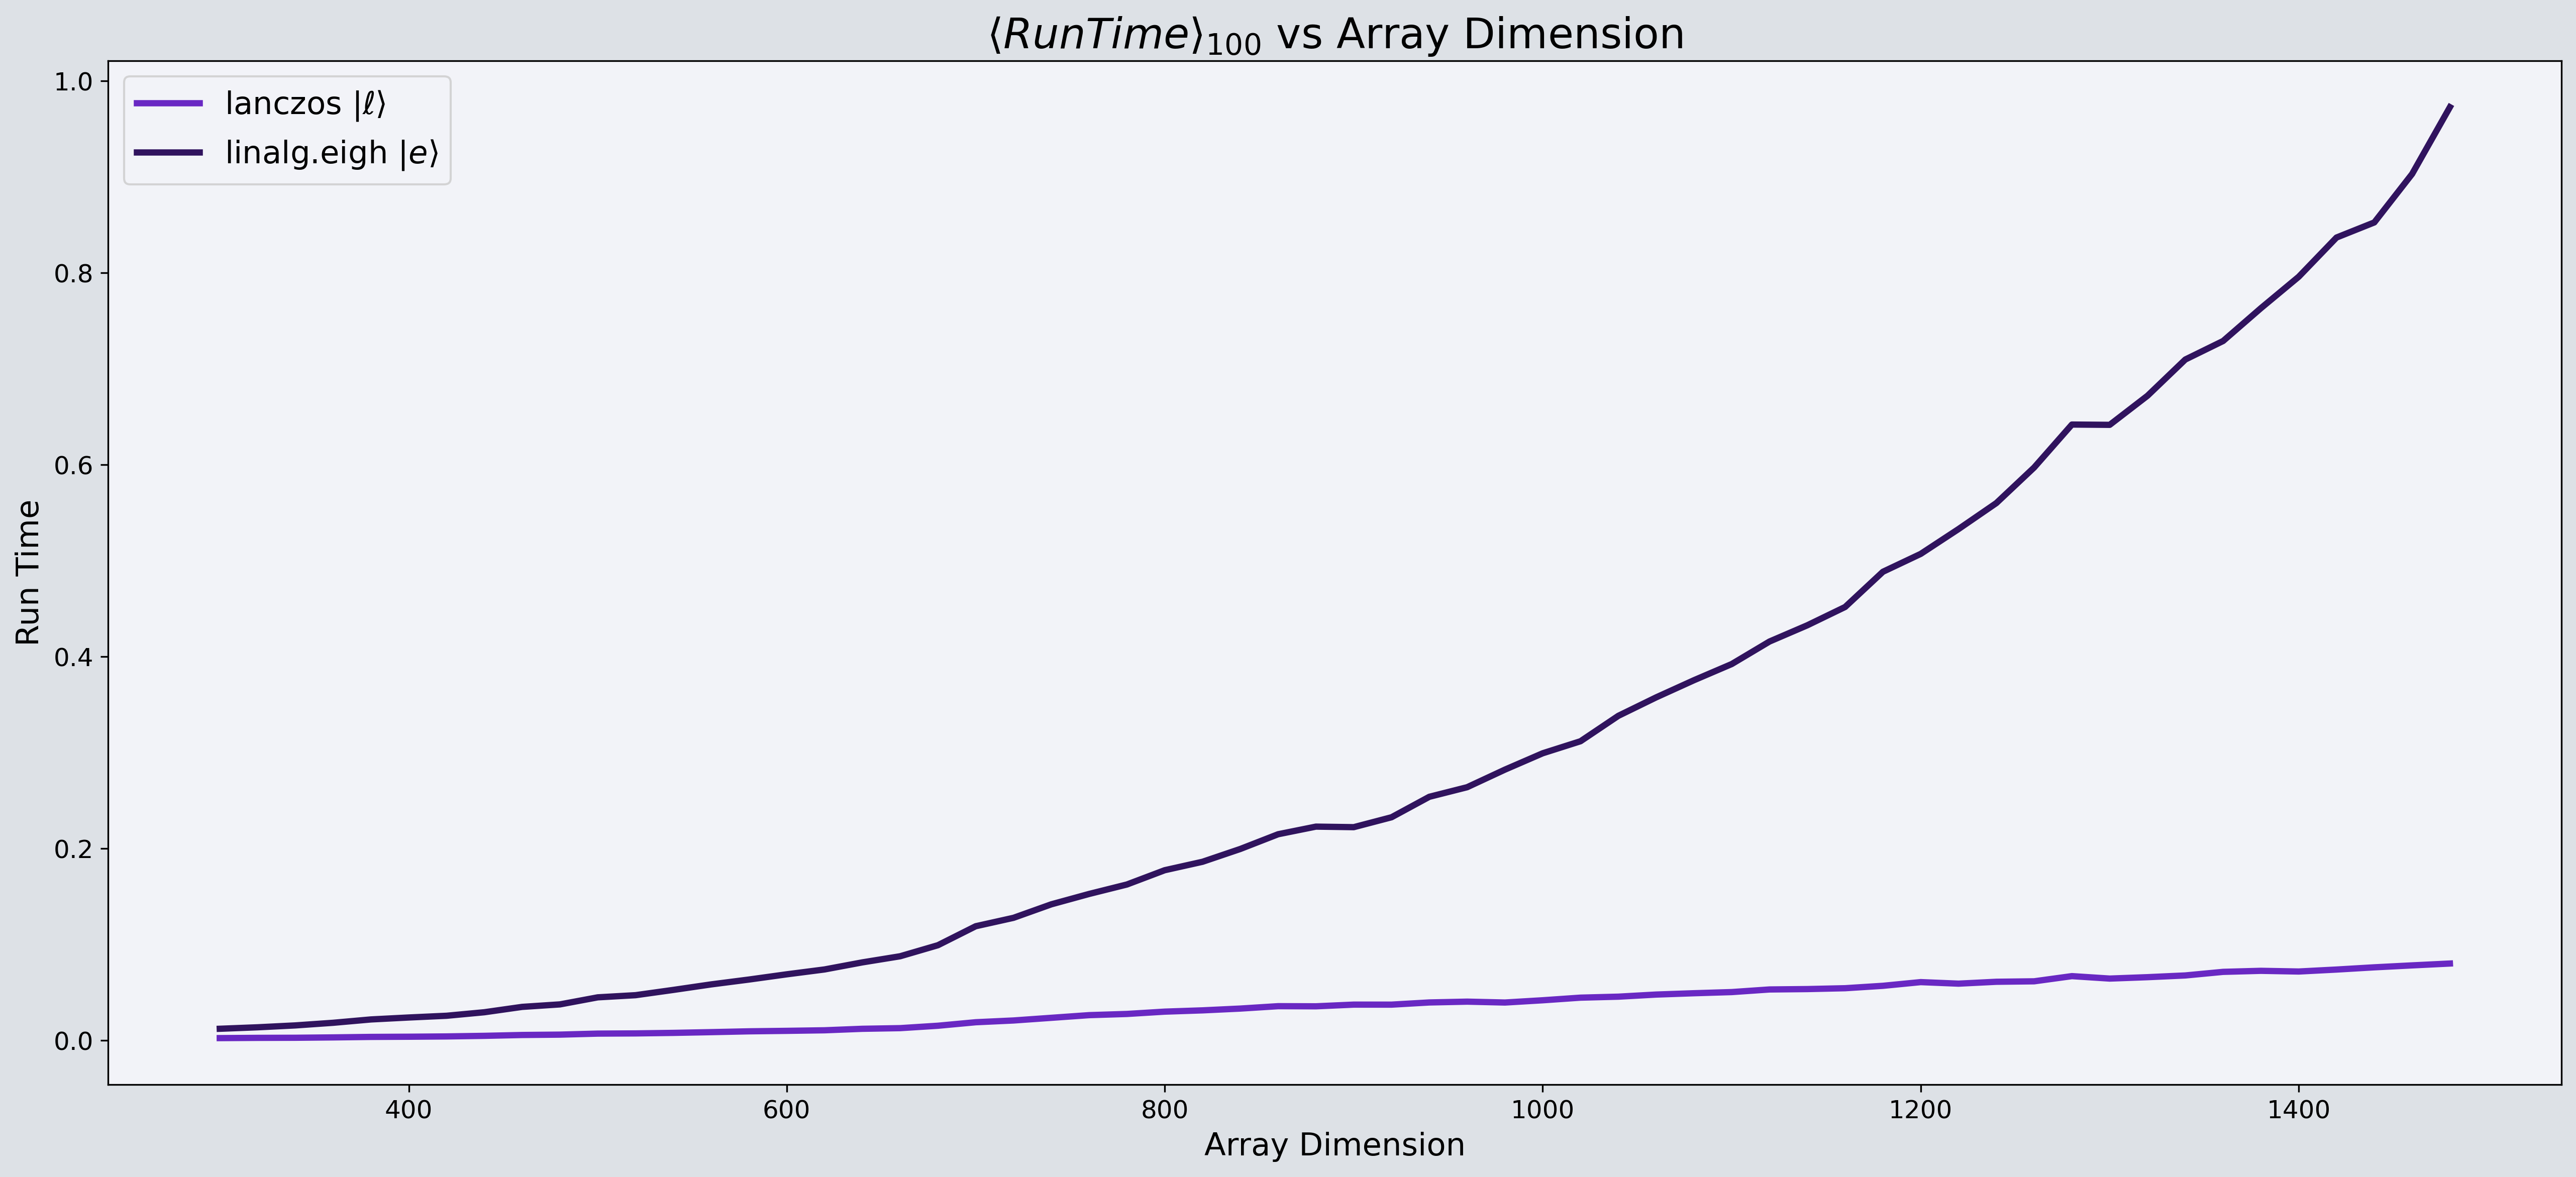

In [28]:
plt.rcParams['axes.facecolor']=background2

plt.figure(figsize=(21,9),dpi=300,facecolor=background1)
plt.plot(range(300,1500,20), np.array(runtime_vals)[:,0],'-o', markersize=1, linewidth=3,label='lanczos $|\ell \\rangle$',color=purple)
plt.plot(range(300,1500,20), np.array(runtime_vals)[:,1],'-o', markersize=1, linewidth=3,label='linalg.eigh $|e \\rangle$',color=darkpurple)
plt.xlabel('Array Dimension',fontsize=15)
plt.ylabel('Run Time',fontsize=15)
plt.title('$ \langle Run Time \\rangle_{100} $ vs Array Dimension',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('lanczos-vs-numpy-eigh.png',bbox_inches='tight')

Text(0, 0.5, 'Fidelity $\\langle e | \\ell \\rangle$')

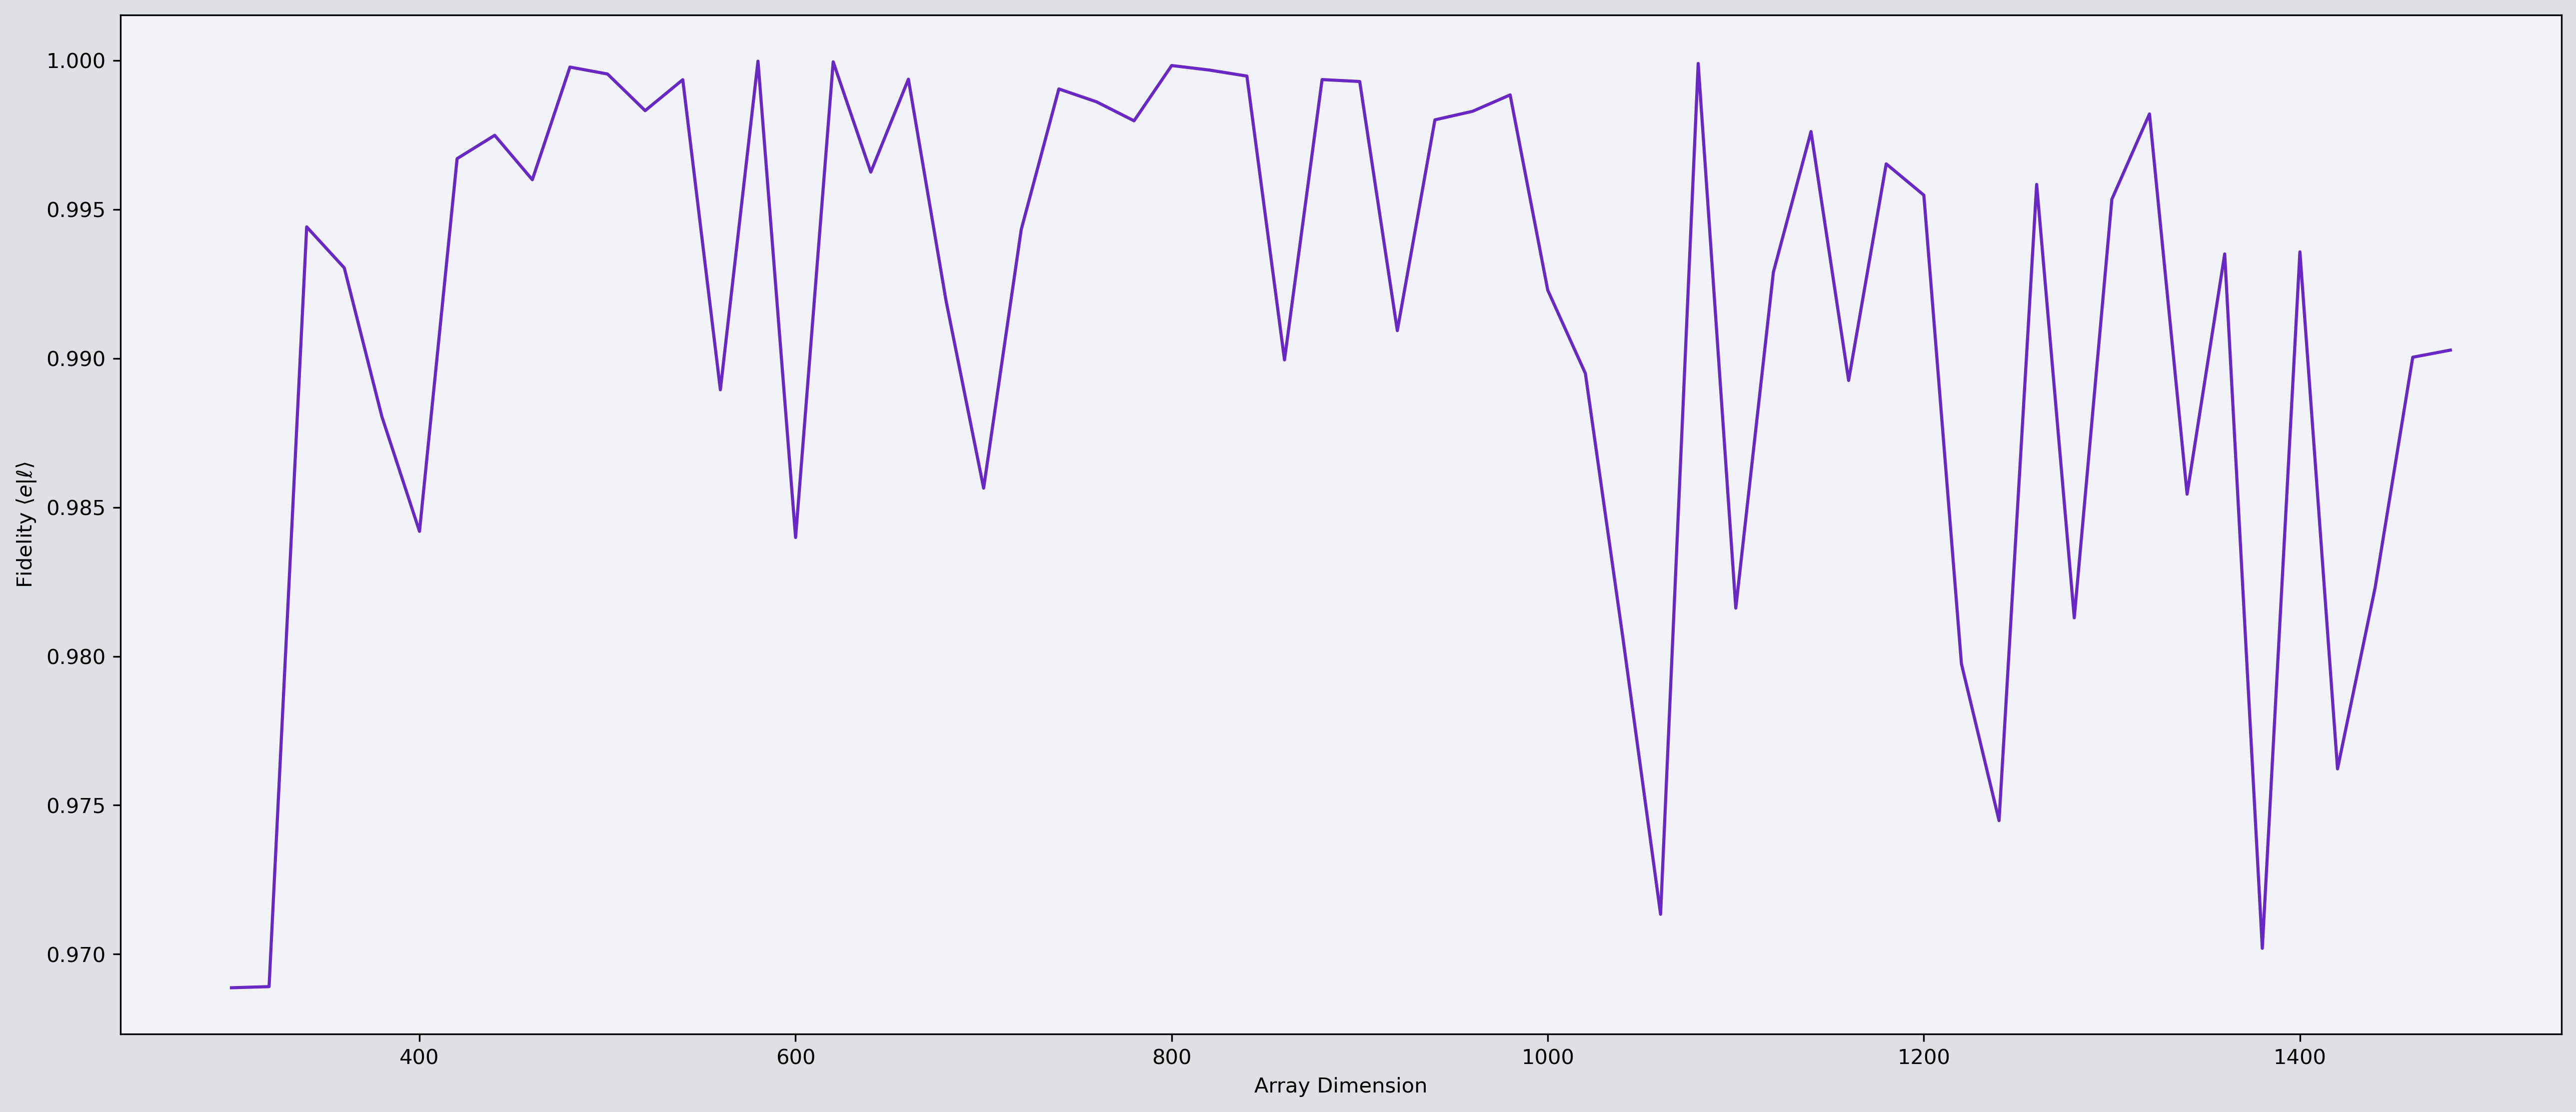

In [27]:
plt.rcParams['axes.facecolor']=background2
plt.figure(figsize=(21,9),dpi=300,facecolor=background1)

plt.plot(range(300,1500,20), np.array(runtime_vals)[:,2], color = purple)
plt.xlabel('Array Dimension')
plt.ylabel('Fidelity $\langle e | \ell \\rangle$')